<a href="https://colab.research.google.com/github/roh203/Transfer-Learning-For-Improving-the-Prediction-Accuracy-of-Experimental-Data/blob/main/model_training_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install keras-tuner --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Transfer_DataSet - Sheet7.csv')

In [ ]:
data.head()

,CZA,220,4,1500,10.4,35.9,19.8,141,16.3,table 4,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CZA,220,4.0,1500.0,11.8,56.2,34.9,126.0,22.9,0.7g,Preparation and CO2 hydrogenation catalytic pr...,NaN,NaN
1,CZA,220,4.0,1500.0,12.7,58.7,39.3,90.0,31.6,NaN,NaN,NaN,NaN
2,CZA,220,4.0,1500.0,15.0,58.9,46.8,93.0,33.5,NaN,NaN,NaN,NaN
3,CZA,240,4.0,1500.0,14.1,33.6,25.2,141.0,16.3,NaN,NaN,NaN,NaN
4,CZA,240,4.0,1500.0,15.6,51.3,42.4,126.0,22.9,NaN,NaN,NaN,NaN


In [ ]:
data.columns = ['Catalyst Name', 'Temp(C)','Pressure(mpa)', 'WHSV','CO2 Conversion%','Methanol Selectivity%',"STY",'BET','ASA',"U1",'U2','U3','U4']

In [ ]:
data.isnull().sum()

Catalyst Name            236
Temp(C)                    0
Pressure(mpa)              0
WHSV                       0
CO2 Conversion%            0
Methanol Selectivity%      2
STY                        0
BET                        0
ASA                       26
U1                       378
U2                       354
U3                       378
U4                       385
dtype: int64

In [ ]:
data = data.drop(['U1','U2','U3',"U4"],axis = 1)

In [ ]:
data = data[['Catalyst Name','BET','ASA',"Temp(C)",'Pressure(mpa)','WHSV','CO2 Conversion%','Methanol Selectivity%','STY']]

In [ ]:
data.head()

,Catalyst Name,BET,ASA,Temp(C),Pressure(mpa),WHSV,CO2 Conversion%,Methanol Selectivity%,STY
0,CZA,126.0,22.9,220,4.0,1500.0,11.8,56.2,34.9
1,CZA,90.0,31.6,220,4.0,1500.0,12.7,58.7,39.3
2,CZA,93.0,33.5,220,4.0,1500.0,15.0,58.9,46.8
3,CZA,141.0,16.3,240,4.0,1500.0,14.1,33.6,25.2
4,CZA,126.0,22.9,240,4.0,1500.0,15.6,51.3,42.4


In [ ]:
data = data.drop(['Catalyst Name', 'STY'],axis = 1)

In [ ]:
data['Temp(C)'].mean()

239.30051813471502

In [ ]:
data['Methanol Selectivity%'] = data['Methanol Selectivity%'].fillna(data['Methanol Selectivity%'].mean())
data['ASA'] = data['ASA'].fillna(data['ASA'].mean())

In [ ]:
data.isnull().sum()

BET                      0
ASA                      0
Temp(C)                  0
Pressure(mpa)            0
WHSV                     0
CO2 Conversion%          0
Methanol Selectivity%    0
dtype: int64

In [ ]:
data.corr()

,BET,ASA,Temp(C),Pressure(mpa),WHSV,CO2 Conversion%,Methanol Selectivity%
BET,1.000000,0.507937,-0.113342,-0.010801,0.365495,-0.043478,0.109069
ASA,0.507937,1.000000,-0.156261,0.060580,0.231320,-0.087372,0.328978
Temp(C),-0.113342,-0.156261,1.000000,-0.102124,-0.077013,0.341300,-0.693782
Pressure(mpa),-0.010801,0.060580,-0.102124,1.000000,-0.100512,-0.291599,0.286019
WHSV,0.365495,0.231320,-0.077013,-0.100512,1.000000,-0.085058,-0.034754
CO2 Conversion%,-0.043478,-0.087372,0.341300,-0.291599,-0.085058,1.000000,-0.393468
Methanol Selectivity%,0.109069,0.328978,-0.693782,0.286019,-0.034754,-0.393468,1.000000


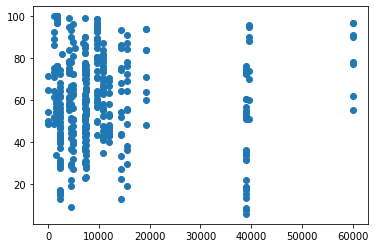

In [ ]:
plt.scatter(data['WHSV'],data['Methanol Selectivity%'])

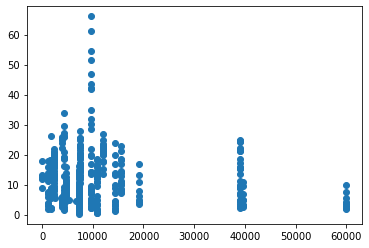

In [ ]:
plt.scatter(data['WHSV'],data['CO2 Conversion%'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data.to_numpy())
data_sc = pd.DataFrame(data_sc, columns = ['BET','ASA','Temp(C)','Pre','WHSV','CO2 C','Sel',])

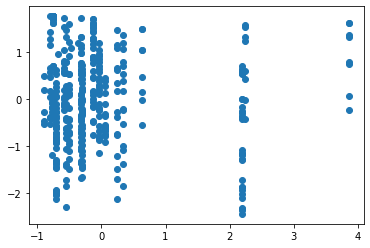

In [ ]:
plt.scatter(data_sc['WHSV'],data_sc['Sel'])

In [ ]:
data_sc.head()

,BET,ASA,Temp(C),Pre,WHSV,CO2 C,Sel
0,0.628220,-0.357696,-0.545612,0.455375,-0.776326,-0.103219,-0.187266
1,-0.158173,-0.002106,-0.545612,0.455375,-0.776326,-0.004302,-0.075929
2,-0.092640,0.075552,-0.545612,0.455375,-0.776326,0.248487,-0.067022
3,0.955884,-0.627455,0.019774,0.455375,-0.776326,0.149570,-1.193747
4,0.628220,-0.357696,0.019774,0.455375,-0.776326,0.314432,-0.405485


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch
import tensorflow as tf


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
x = data_sc.iloc[:,:-2]
y = data_sc.iloc[:,-2]
z = data_sc.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_test

(308, 5) (78, 5) (308,) (78,)


,BET,ASA,Temp(C),Pre,WHSV
336,0.846663,-2.800388e-01,0.019774,-1.013700,2.194778
307,-0.846267,-1.097488e+00,0.019774,-0.279162,-0.705019
90,0.431622,-1.452081e-16,2.281318,0.822644,-0.039492
265,-0.791656,-2.718643e-01,0.302467,1.189913,0.055583
150,1.327237,5.864573e-01,0.302467,-1.013700,-0.546561
...,...,...,...,...,...
18,1.196171,-1.142039e+00,0.019774,-0.279162,-0.324718
137,-1.613000,-7.541592e-01,1.715932,-0.279162,-0.514869
357,-0.048952,-5.743204e-01,0.585160,-1.013700,2.194778
168,-1.309365,-1.082365e+00,1.150546,-0.279162,-0.705019


In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))  # # input layer
model.add(Dense(306, activation='relu'))
model.add(Dense(466, activation='relu'))
model.add(Dense(202, activation='relu'))
model.add(Dense(994, activation='relu'))
model.add(Dense(162, activation='relu'))
model.add(Dense(866, activation='relu'))
model.add(Dense(1, activation='linear'))    ## output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 306)               1836      
                                                                 
 dense_2 (Dense)             (None, 466)               143062    
                                                                 
 dense_3 (Dense)             (None, 202)               94334     
                                                                 
 dense_4 (Dense)             (None, 994)               201782    
                                                                 
 dense_5 (Dense)             (None, 162)               161190    
                                                                 
 dense_6 (Dense)             (None, 866)               1

In [ ]:
losses = tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error")
model.compile(loss=losses, optimizer='adam')
history=model.fit(x_train, y_train, epochs=1000, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 1s 23ms/step - loss: 0.7579 - val_loss: 0.5901
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.7037 - val_loss: 0.5728
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6358 - val_loss: 0.5978
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6028 - val_loss: 0.5281
Epoch 5/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5467 - val_loss: 0.5986
Epoch 6/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.5287 - val_loss: 0.4868
Epoch 7/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.4873 - val_loss: 0.5569
Epoch 8/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.5068 - val_loss: 0.4869
Epoch 9/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.4908 - val_loss: 0.4538
Epoch 10/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.4551 - val_lo

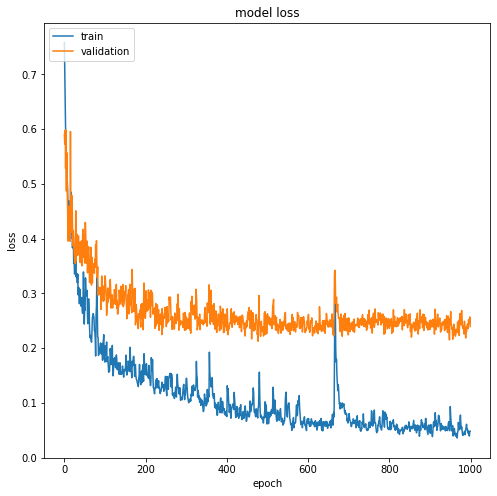

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(x_train, y_train, verbose=0)

In [ ]:
scores

0.08067895472049713

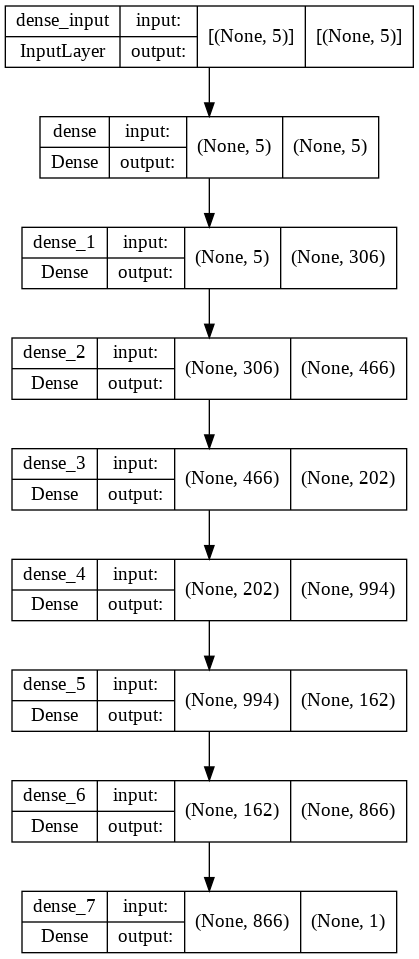

In [ ]:
import tensorflow as tf
tf.keras.utils .plot_model(model,to_file='simple.png',show_shapes=True)

In [ ]:
res=model.predict(x_test)
df_prediction=pd.DataFrame(res, index=y_test.index, columns=['Predictions'])
df_prediction['y_test'] = y_test

In [ ]:
df_prediction

,Predictions,y_test
336,0.300407,0.301127
307,0.318641,0.446321
90,0.402912,0.652532
265,0.961414,1.314595
150,0.995375,0.622174
...,...,...
18,-1.299206,-1.323198
137,-0.460829,-0.432943
357,0.284993,0.340016
168,0.868339,0.820054


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,res)

0.45314615232328614

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers',1,32)):
    model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value = 2, max_value = 32, step = 8),activation = 'relu'))
  model.add(layers.Dense(1, activation = 'linear'))
  model.compile(optimizer =keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])), loss = 'mean_squared_error', metrics = ['mean_squared_error'])
  return model

In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective='val_mean_squared_error', max_trials = 10, executions_per_trial = 5, directory = 'project1', project_name = 'Bioethanol_production')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# tuner.search_space_summary()

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [ ]:
# tuner.search(x_train,y_train,epochs = 100, validation_data = (x_test,y_test))

In [ ]:
# tuner.results_summary()

hyper parameter tuning is not doing well

In [ ]:
import os.path
model.save('model/tl.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/tl.h5')